In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Алгоритм Метрополиса**

In [2]:
def f(x):
    return np.exp(-x**2 / 2)

In [3]:
def metropolis(n_iter):
    selection = []
    x_cur = np.random.normal()
    for i in range(n_iter):
        x_new = x_cur + np.random.normal(0, 1)
        ratio = f(x_new) / f(x_cur)
        R = np.random.uniform(0, 1)
        if R < ratio:
            selection.append(x_new)
            x_cur = x_new
        else:
            selection.append(x_cur)
    return selection

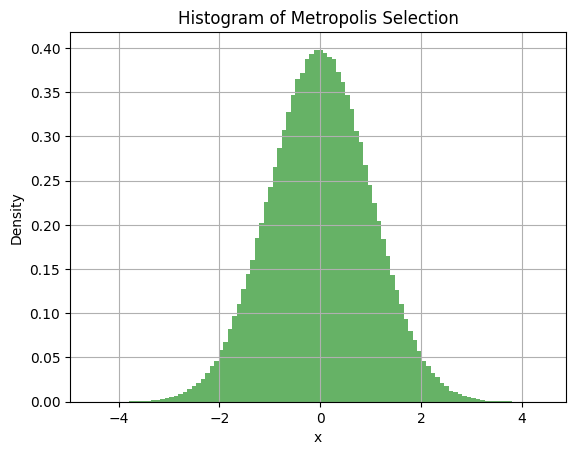

In [7]:
# Генерация выборки
n_iter = 1000000
selection = metropolis(n_iter)

# Построение гистограммы
plt.hist(selection, bins=100, density=True, alpha=0.6, color='g')
plt.title('Histogram of Metropolis Selection')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.show()

**Анализ чувствительности**

In [1]:
import numpy as np
from SALib.sample import sobol as sobol_sample
from SALib.analyze import sobol as sobol_analyze

In [2]:
def f(X):
    return 1e-4 * np.sin(X[:, 0] + X[:, 1]) + X[:, 2]

In [14]:
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-np.pi, np.pi], [-np.pi, np.pi], [0, 1]]
}

param_values = sobol_sample.sample(problem, 32000)
Y = f(param_values)

Si = sobol_analyze.analyze(problem, Y)

for key, value in Si.items():
    print(f"{key}:")
    print(value)
    print()

S1:
[-5.05431284e-08  8.79446254e-08  9.99999889e-01]

S1_conf:
[4.10233719e-06 3.94107489e-06 1.34722224e-02]

ST:
[6.00376340e-08 6.00061762e-08 9.99999993e-01]

ST_conf:
[8.58657657e-10 9.68575167e-10 1.04275000e-02]

S2:
[[            nan  2.20843153e-08  1.22976417e-07]
 [            nan             nan -1.54033698e-07]
 [            nan             nan             nan]]

S2_conf:
[[           nan 5.16729654e-06 5.63559330e-06]
 [           nan            nan 5.91898595e-06]
 [           nan            nan            nan]]

